# Naive Bayes

It is based on Bayes' theorem, that states the probability of an event occurring given some prior knowledge (features).

The features are independant of each other, so the presence or absence of one feature doesn't affect the presence or absence of another feature. 

The algorithm calculates the probability of each class based on the training data, and then calculates the conditional probability of each feature give each class. In this way it can estimate the class of a data point that has certain features, chosing the class with the highest probability as the predicted class. 

Advantages: 
- Needs small amounts of training data
- Can handle high-dimensional data


Disadvantages:
- Is sensitive to irrelevant features, and can lead to overfitting and inaccuracy
- Not very accurate
- Assumes that the training data is representative of the test data, leading to inaccurate predictions
- In the real world, often the features are dependant of each other, and in that case this model can lead to inaccuracies


### Gaussian Naive Bayes
It's a variation of the Naive Bayes algorithm, and the difference is that it assumes that the features follow a continuous normal distribution (the features can have any value within a range).

It is more used with real-world data, such as sensor readings or physical mesurements


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [10]:
model.score(X_test, y_test)


0.9555555555555556

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



AttributeError: module 'matplotlib' has no attribute 'show'

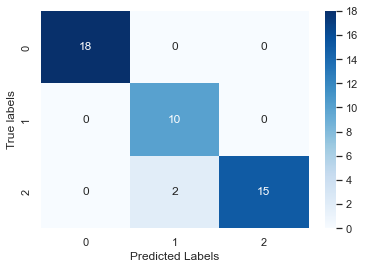

In [18]:
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib as plt
# Set the plot style
sns.set(style="white")
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
ax.set(xlabel="Predicted Labels", ylabel="True labels")

plt.show()